Neural Networks

In [7]:
from typing import List

def step_fxn(input: float) -> float:
    if input > 0.0:
        return 1.0
    else:
        return 0.0

def single_neuron_step_fxn(
    lambda_: float,
    w0: float,
    w1: float,
    w2: float,
    x0: float,
    data: List[List[float]]
) -> List[float]:
    w_not_changed: bool = False
    count: int = 1
    while not w_not_changed:
        w_not_changed = True
        print(f"{count}  Epoch  :\n")
        for i in range(len(data)):
            b: float = w0 * x0  # bias term
            x1: float = data[i][0]
            x2: float = data[i][1]
            input_: float = b + w1 * x1 + w2 * x2
            y: float = step_fxn(input_)  # prediction
            d: float = data[i][2]        # target value
            if y != d:
                # adaptive law
                w0 = w0 + lambda_ * (d - y) * x0
                w1 = w1 + lambda_ * (d - y) * x1
                w2 = w2 + lambda_ * (d - y) * x2
                w_not_changed = False
        count += 1
        print(f"{w0}\t{w1}\t{w2}")
    print("Our Final weights")
    print(f"{w0}\t{w1}\t{w2}")
    return [w0, w1, w2]

if __name__ == "__main__":
    data: List[List[float]] = [
        [0.2, 0.1, 1],
        [0.4, 0.6, 1],
        [0.5, 0.2, 1],
        [0.7, 0.9, 0]
    ]
    single_neuron_step_fxn(1, 0, 0, 0, 1, data)

1  Epoch  :

0.0	-0.49999999999999994	-0.8
2  Epoch  :

0.0	-0.9999999999999999	-1.6
3  Epoch  :

1.0	-1.0999999999999996	-1.8
4  Epoch  :

1.0	-1.3999999999999995	-2.1
5  Epoch  :

2.0	-0.9999999999999994	-1.5
6  Epoch  :

2.0	-0.9999999999999994	-1.5
Our Final weights
2.0	-0.9999999999999994	-1.5


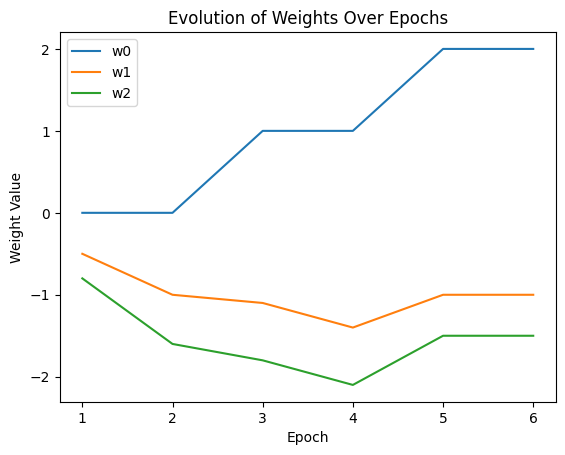

In [11]:
import matplotlib.pyplot as plt

def single_neuron_step_fxn_with_tracking(
    lambda_: float,
    w0: float,
    w1: float,
    w2: float,
    x0: float,
    data: List[List[float]]
):
    weights_history = []
    w_not_changed = False
    count = 1
    while not w_not_changed:
        w_not_changed = True
        for i in range(len(data)):
            b = w0 * x0
            x1 = data[i][0]
            x2 = data[i][1]
            input_ = b + w1 * x1 + w2 * x2
            y = step_fxn(input_)
            d = data[i][2]
            if y != d:
                w0 = w0 + lambda_ * (d - y) * x0
                w1 = w1 + lambda_ * (d - y) * x1
                w2 = w2 + lambda_ * (d - y) * x2
                w_not_changed = False
        weights_history.append([w0, w1, w2])
        count += 1
    return weights_history

weights_history = single_neuron_step_fxn_with_tracking(1, 0, 0, 0, 1, data)
weights_history = [[w0, w1, w2] for w0, w1, w2 in weights_history]
epochs = range(1, len(weights_history) + 1)
w0_vals = [w[0] for w in weights_history]
w1_vals = [w[1] for w in weights_history]
w2_vals = [w[2] for w in weights_history]

plt.plot(epochs, w0_vals, label='w0')
plt.plot(epochs, w1_vals, label='w1')
plt.plot(epochs, w2_vals, label='w2')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Evolution of Weights Over Epochs')
plt.legend()
plt.show()